In [1]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/MyDrive/Thesis/Jason/Notebooks/Final

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1_UrMWiRHhBVY6BmkXpUmghuXVDupcUm8/Jason/Notebooks/Final


# Load

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    context='notebook',
    style='whitegrid',
)

cm = 1/2.54

In [2]:
idx_samples = [585,344,178,1119,719,770,803,169,401,985]
df = pd.read_excel('./Datasets/Medical Cost Personal.xlsx')

df.loc[idx_samples,:]

,age,sex,bmi,children,smoker,region,charges
585,46,female,27.720,1,no,southeast,8232.64
344,20,female,37.000,5,no,southwest,4830.63
178,19,male,20.615,2,no,northwest,2803.70
1119,52,female,24.130,1,yes,northwest,23887.66
719,47,female,33.915,3,no,northwest,10115.01
770,49,female,41.470,4,no,southeast,10977.21
803,52,female,44.700,3,no,southwest,11411.69
169,25,male,26.220,0,no,northeast,2721.32
401,38,male,28.270,1,no,southeast,5484.47
985,21,female,21.850,1,yes,northeast,15359.10


# EDA

## Null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Duplicate

In [ ]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
41,19,male,30.59,0,no,northwest,1639.56
42,19,male,30.59,0,no,northwest,1639.56


## Target

#### `charges`

Individual medical costs billed by health insurance

In [ ]:
index = ['variance', 'skewness', 'kurtosis']
df_selected = df[['charges']]
columns = df_selected.columns

with pd.option_context('display.float_format', lambda x: '%.6f' % x, 'styler.format.thousands', ','):
    display(pd.concat([
        df_selected.describe(),
        pd.DataFrame(stats.describe(df_selected)[3:], index=index, columns=columns),
    ]))

,charges
count,1338.000000
mean,13270.422444
std,12110.011241
min,1121.870000
25%,4740.287500
50%,9382.030000
75%,16639.915000
max,63770.430000
variance,146652372.253845
skewness,1.514180


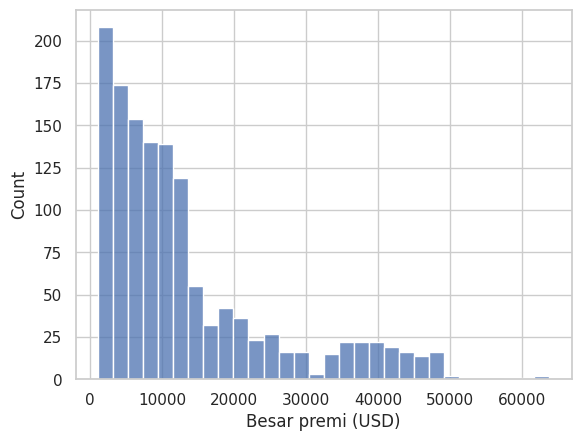

In [ ]:
kwargs = {
    'data': df,
    'x': 'charges',
    'discrete': False,
    'bins': 'auto',
}

sns.histplot(**kwargs, log_scale=[False, False])

plt.xlabel('Besar premi (USD)')

plt.show()

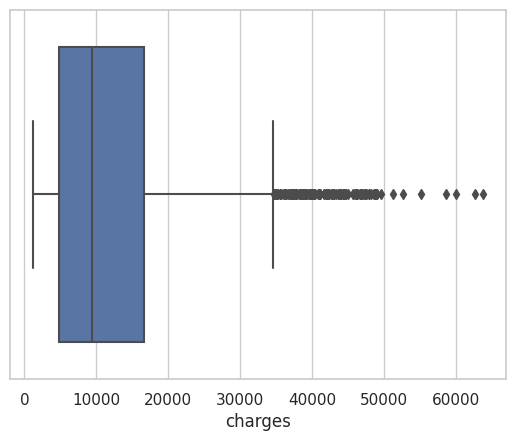

In [ ]:
kwargs = {
    'data': df,
    'x': 'charges',
}

sns.boxplot(**kwargs)

plt.show()

## Feature

### Numerical

#### `age`

age of primary beneficiary

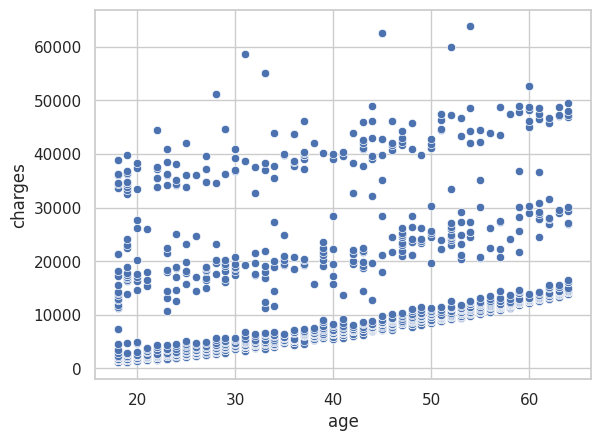

In [ ]:
x = 'age'

sns.scatterplot(data=df, x=x, y='charges')

plt.show()

#### `bmi`

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

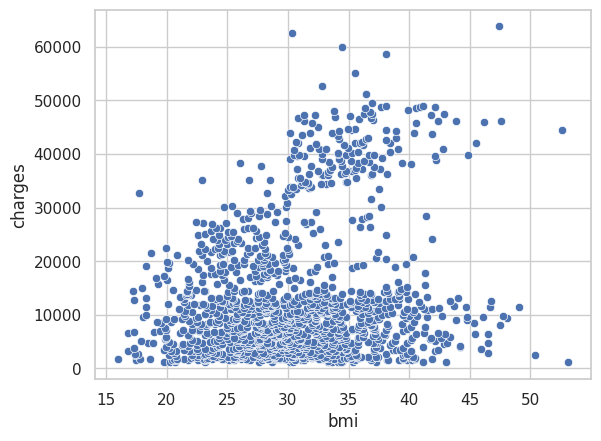

In [ ]:
x = 'bmi'

sns.scatterplot(data=df, x=x, y='charges')

plt.show()

Binning according to Weir & Jan (2022).

In [3]:
bins = [-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ['underweight', 'normal', 'overweight',
          'class I obese', 'class II obese', 'class III obese']

ser_binned_bmi = pd.cut(df['bmi'], bins=bins, labels=labels)
ser_binned_bmi.value_counts().sort_index()

underweight         21
normal             221
overweight         380
class I obese      397
class II obese     226
class III obese     93
Name: bmi, dtype: int64

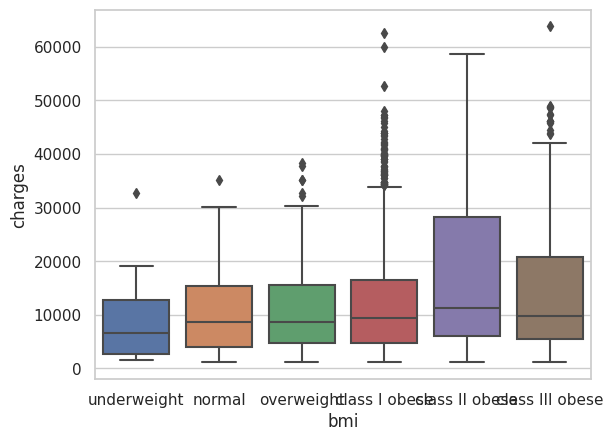

In [ ]:
sns.boxplot(data=df, x=ser_binned_bmi, y='charges')

plt.show()

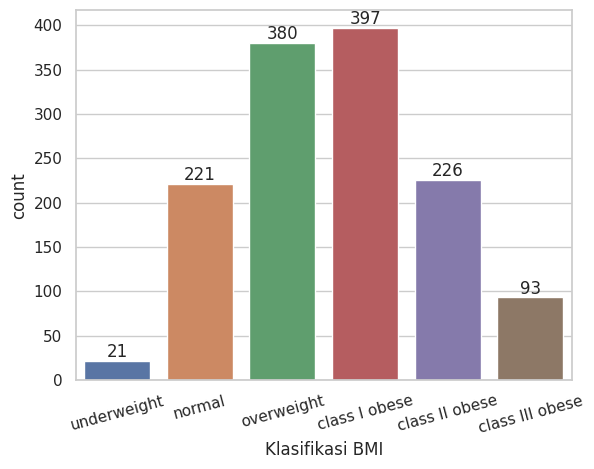

In [ ]:
bins = [-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ['underweight', 'normal', 'overweight', 'class I obese', 'class II obese', 'class III obese']

ser_binned_bmi = pd.cut(df['bmi'], bins=bins, labels=labels)

ax = sns.countplot(data=df, x=ser_binned_bmi)
ax.bar_label(ax.containers[0])

plt.xlabel('Klasifikasi BMI')
plt.xticks(rotation=15)

plt.show()

In [ ]:
pd.concat([ser_binned_bmi, df['charges']], axis=1).groupby('bmi').agg(['median'])

,charges
,median
bmi,
underweight,6640.54
normal,8604.48
overweight,8659.38
class I obese,9411.01
class II obese,11313.65
class III obese,9748.91


#### `children`

Number of children covered by health insurance / Number of dependents

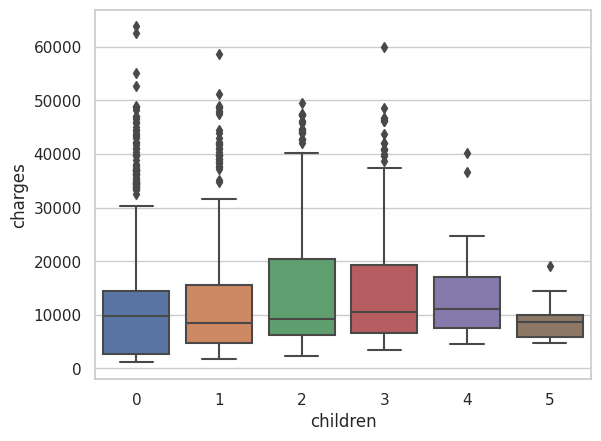

In [ ]:
x = 'children'

sns.boxplot(data=df, x=x, y='charges')

plt.show()

In [ ]:
df[['children', 'charges']].groupby('children').median()

,charges
children,
0,9856.950
1,8483.870
2,9264.980
3,10600.550
4,11033.660
5,8589.565


### Categorical

In [ ]:
df.describe(include=[object])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#### `sex`

insurance contractor gender, female, male

In [ ]:
df['sex'].value_counts().sort_index()

female    662
male      676
Name: sex, dtype: int64

In [ ]:
df[['charges', 'sex']].groupby('sex').agg(['mean', 'median'])

charges          
                mean    median
sex                           
female  12569.578927  9412.965
male    13956.751450  9369.615

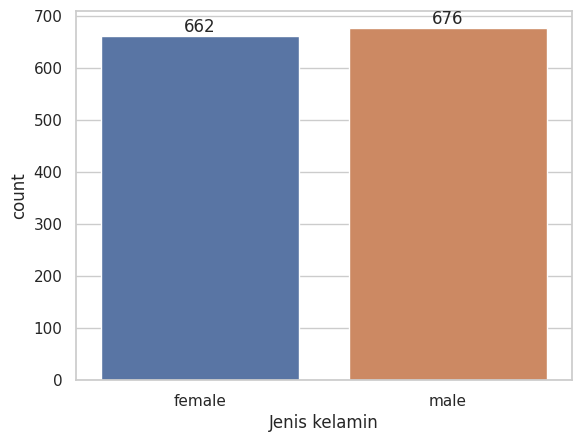

In [ ]:
kwargs = {
    'data': df,
    'x': 'sex',
}

order = np.sort(df[kwargs['x']].unique())

rc = {
    'figure.figsize': [15*cm, 9*cm],
    'figure.dpi': 600,
}
with plt.rc_context(rc=None):
    ax =sns.countplot(**kwargs, order=order)
    ax.bar_label(ax.containers[0])

    plt.xlabel('Jenis kelamin')
    plt.xticks(rotation=0)

    plt.show()

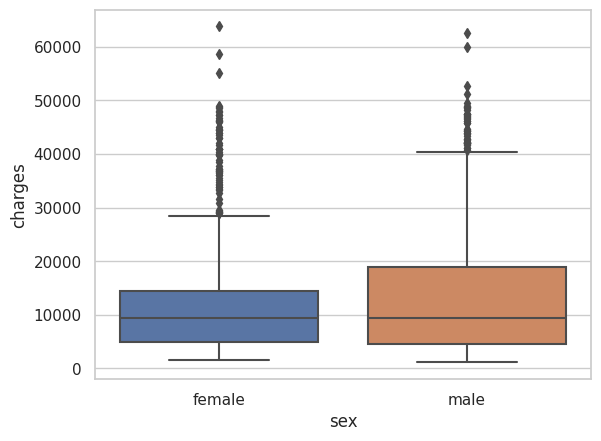

In [ ]:
sns.boxplot(data=df, x='sex', y='charges', order=order)
plt.show()

#### `smoker`

Smoking

In [6]:
df['smoker'].value_counts().sort_index()

no     1064
yes     274
Name: smoker, dtype: int64

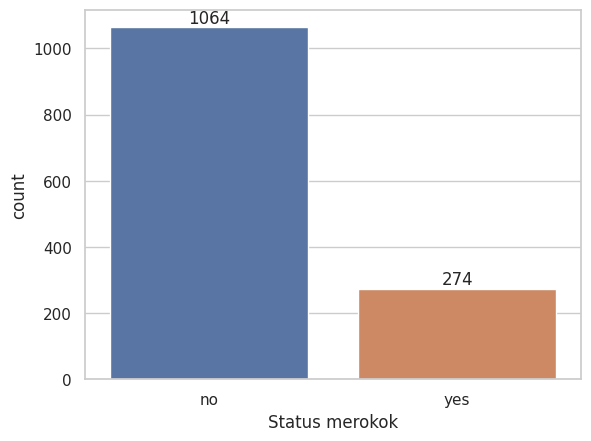

In [7]:
kwargs = {
    'data': df,
    'x': 'smoker',
}

rc = {
    'figure.figsize': [15*cm, 9*cm],
    'figure.dpi': 600,
}
with plt.rc_context(rc=None):
    ax = sns.countplot(**kwargs)
    ax.bar_label(ax.containers[0])

    plt.xlabel('Status merokok')
    plt.xticks(rotation=0)

    plt.show()

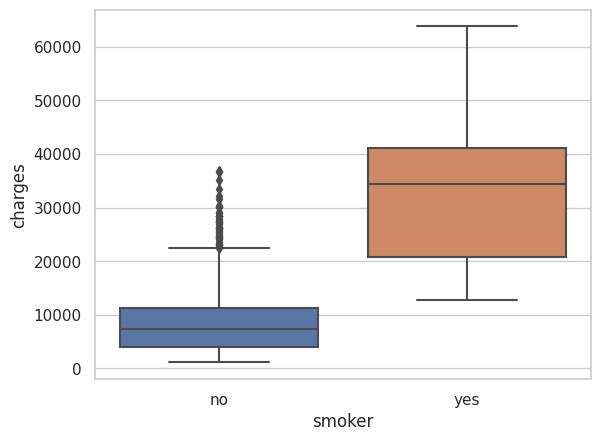

In [8]:
kwargs = {
    'data': df,
    'x': 'smoker',
    'y': 'charges',
}

order = np.sort(df[kwargs['x']].unique())

sns.boxplot(**kwargs, order=order)
plt.show()

In [9]:
df[['smoker', 'charges']].groupby('smoker').agg(['mean', 'median'])

charges           
                mean     median
smoker                         
no       8434.268487   7345.405
yes     32050.231971  34456.350

#### `region`

the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

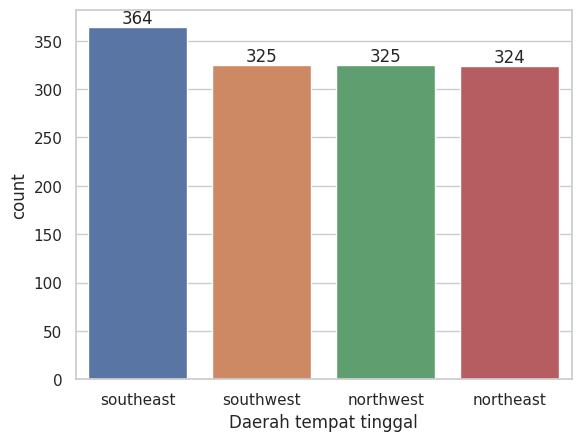

In [ ]:
kwargs = {
    'data': df,
    'x': 'region',
}

order = df[kwargs['x']].value_counts().index

rc = {
    'figure.figsize': [15*cm, 9*cm],
    'figure.dpi': 600,
}
with plt.rc_context(rc=None):
    ax = sns.countplot(**kwargs, order=order)
    ax.bar_label(ax.containers[0])

    plt.xlabel('Daerah tempat tinggal')
    plt.xticks(rotation=0)

    plt.show()

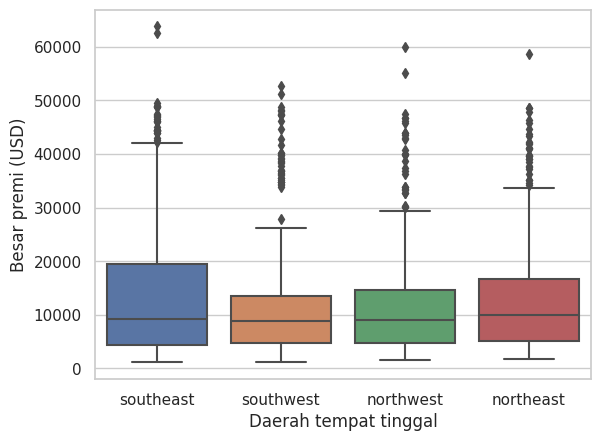

In [ ]:
kwargs = {
    'data': df,
    'x': 'region',
    'y': 'charges',
}

rc = {
    'figure.figsize': [15*cm, 9*cm],
    'figure.dpi': 600,
}
with plt.rc_context(rc=None):
    ax = sns.boxplot(**kwargs, order=order)

    plt.ylabel('Besar premi (USD)')
    plt.xlabel('Daerah tempat tinggal')
    plt.xticks(rotation=0)

    plt.show()

In [ ]:
df[['charges', 'region']].groupby('region').median()

,charges
region,
northeast,10057.655
northwest,8965.800
southeast,9294.130
southwest,8798.590


### Multicollinearity and Interaction

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
base_columns = ['sex_male', 'smoker_no',
                'region_southeast', 'bmi3_class I obese']

X = (
    df.assign(bmi3=lambda df: pd.cut(df['bmi'], bins=bins, labels=labels))
    .drop(columns=['charges', 'bmi'])
)

X = (pd.get_dummies(X).drop(base_columns, axis=1))
X = sm.tools.tools.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,15.972837
1,age,1.020706
2,children,1.004913
3,sex_female,1.009465
4,smoker_yes,1.013842
5,region_northeast,1.523264
6,region_northwest,1.539999
7,region_southwest,1.497115
8,bmi3_underweight,1.051149
9,bmi3_normal,1.317330


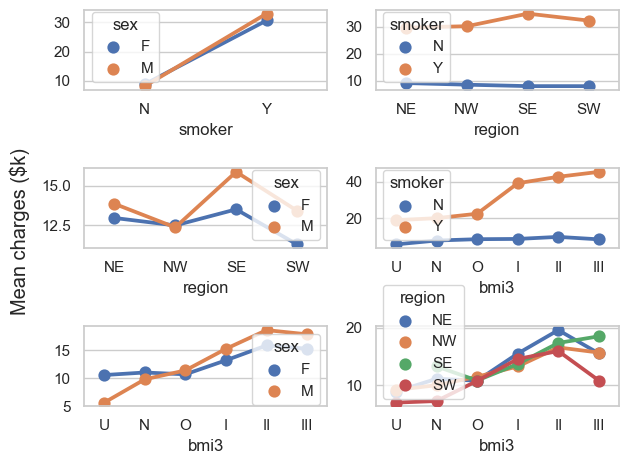

In [5]:
pairs = [
    ['sex', 'smoker'],
    ['sex', 'region'],
    ['sex', 'bmi3'],
    ['smoker', 'region'],
    ['smoker', 'bmi3'],
    ['region', 'bmi3'],
]

mapper = {
    'sex': {'male': 'M', 'female': 'F'},
    'smoker': {'yes': 'Y', 'no': 'N'},
    'region': {'northeast': 'NE','northwest': 'NW',
               'southeast': 'SE', 'southwest': 'SW'},
    'bmi3': {
        'underweight': 'U',
        'normal': 'N',
        'overweight': 'O',
        'class I obese': 'I',
        'class II obese': 'II',
        'class III obese': 'III',
    },
}

fig, axs = plt.subplots(3, 2)

for i, (pair, ax) in enumerate(zip(pairs,axs.flatten(order='F'))):
    sns.pointplot(
        data=(
            df
            .assign(bmi3=lambda df: pd.cut(df['bmi'], bins=bins, labels=labels))
            .drop(columns=['bmi'])
            .assign(**{pair[0]: lambda df: df[pair[0]].map(mapper[pair[0]]),
                       pair[1]: lambda df: df[pair[1]].map(mapper[pair[1]]),
                       'charges': lambda df: df['charges'] / 1000})
            .groupby(pair)
            .agg({'charges': ['mean']})
            .reset_index()
            .set_axis(pair + ['mean charges ($k)'], axis=1)
        ),
        x=pair[1],
        y='mean charges ($k)',
        hue=pair[0],
        ax=ax,
    )
    ax.set_ylabel("")
            
fig.supylabel("Mean charges ($k)")
plt.tight_layout()

# Modeling

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    context='notebook',
    style='whitegrid',
)

# df = pd.read_excel('./Datasets/Medical Cost Personal.xlsx')
df = pd.read_csv('./Datasets/Shuffled Medical Cost Personal.csv')

cm = 1/2.54
random_state = 42

## ML

### Random Forest with bmi3 (binned accoding to Weir & Jan (2022))

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split

bins = [-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ['underweight', 'normal', 'overweight',
          'class I obese', 'class II obese', 'class III obese']

# Binning
y = df['charges']
X = (
    df.assign(bmi3=lambda df: pd.cut(df['bmi'], bins=bins, labels=labels))
    .drop(columns=['charges', 'bmi2', 'bmi'])
)

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=False)

# Categorical transformer
transformer = make_column_transformer(
    (
        OneHotEncoder(drop='if_binary'),
        make_column_selector(dtype_exclude='number')
    ),
    remainder='passthrough'
)

#### Base Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

rfr = RandomForestRegressor(
    n_estimators=1000,
    random_state=random_state,
)

reg = make_pipeline(transformer, rfr)

In [ ]:
reg.fit(X_train, y_train)

# Training
y_pred = reg.predict(X_train)
train_score = metrics.mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE Training: {train_score}")

# Cross validation
cv_score = -cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print(f"RMSE CV: {cv_score}")

RMSE Training: 2019.1449584522707
RMSE CV: 4915.3362220309955


#### Hyperparameter Tuning

##### Number of Trees

In [ ]:
from sklearn.model_selection import GridSearchCV

n_trees = np.arange(50, 1010, 50)

rfr = RandomForestRegressor(
    random_state=random_state,
    n_jobs=-1,
)

gscv = GridSearchCV(rfr, param_grid={'n_estimators': n_trees},
                   cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

reg = make_pipeline(transformer, gscv)
reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2bc8873340>)])),
                ('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=RandomForestRegressor(n_jobs=-1,
                                                              random_state=42),
                              n_jobs=-1,
                              param_grid={'n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])},
                              scoring='neg_root_mean_squared_error'))])

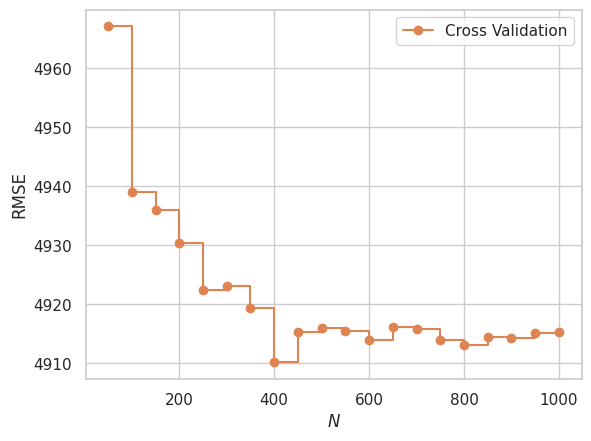

In [ ]:
rc = {
    'figure.figsize': (12*cm, 8*cm),
    'figure.dpi': 600,
    }

with plt.rc_context(
    # rc=rc,
    rc=None,
    ):
    plt.plot(n_trees, -reg[1].cv_results_['mean_test_score'],
             color='C1', marker="o",
             label="Cross Validation", drawstyle="steps-post")
    plt.legend(loc='best')
    plt.xlabel('$N$')
    plt.ylabel('RMSE')
    plt.show()

Chosen: 400

##### Pruning

In [ ]:
from sklearn.model_selection import GridSearchCV
N_TREES = 400

rc = {
    'figure.figsize': (12*cm, 8*cm),
    'figure.dpi': 600,
    }


def plot_ccp_alphas(reg, rc=None):
    with plt.rc_context(rc=rc):
        plt.plot(
            reg[1].cv_results_['param_ccp_alpha'].compressed() / 1e3,
            -reg[1].cv_results_['mean_test_score'],
            color='C1',
            marker="o",
            label="Cross Validation",
            drawstyle="steps-post"
            )
        plt.legend(loc='best')
        plt.xlabel('CCP (1000)')
        plt.ylabel('RMSE')
        plt.show()

    return None


def check_ccp_alphas(ccp_alphas, rc=None):
    rfr = RandomForestRegressor(
        n_estimators=N_TREES,
        n_jobs=-1,
        random_state=random_state
        )

    gscv = GridSearchCV(
        rfr,
        {'ccp_alpha': ccp_alphas},
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        refit=False,
        cv=10,
        )

    reg = make_pipeline(transformer, gscv)

    reg.fit(X_train, y_train)

    plot_ccp_alphas(reg, rc=rc)

    return reg

In [ ]:
ccp_alphas = np.linspace(0.0*1e6, 1*1e6, 1000+1, endpoint=True)

reg = check_ccp_alphas(ccp_alphas, rc=None)

# pd.DataFrame(reg.cv_results_).to_csv('ccp_alphas.csv', index=False)

In [ ]:
df_reg = pd.read_csv('ccp_alphas.csv')

x = df_reg['param_ccp_alpha'] / 1e3
y = -df_reg['mean_test_score']
idxmin = df_reg['rank_test_score'].idxmin()

with plt.rc_context(rc=None):
    plt.plot(x, y, '-', color='C1', label="Cross Validation")

    plt.axvline(x[idxmin], color='C0',
                label=f"$CCP={df_reg.loc[idxmin, 'param_ccp_alpha']:.0f}$")

    plt.legend(loc='best')
    plt.xlim(x.min(), x.max())
    plt.xlabel('$CCP$ ($1000$)')
    plt.ylabel('RMSE')
    plt.show()

In [ ]:
CCP_ALPHA = df_reg.loc[idxmin, 'param_ccp_alpha']
CCP_ALPHA

#### Creating Final Model and Evaluation

In [10]:
N_TREES = 400
CCP_ALPHA = 332000.0

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

y = df['charges']
X = (
    df.assign(bmi3=lambda df: pd.cut(df['bmi'], bins=bins, labels=labels))
    .drop(columns=['charges', 'bmi2', 'bmi'])
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), make_column_selector(dtype_exclude='number')),
    remainder='passthrough'
)

rfr = RandomForestRegressor(
    n_estimators=N_TREES,
    ccp_alpha=CCP_ALPHA,
    n_jobs=-1,
    random_state=random_state,
)

reg = make_pipeline(transformer, rfr)

In [12]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
test_score = metrics.mean_squared_error(y_train, y_pred, squared=False)
print(f"Train RMSE: {test_score}")

cv_score = cross_val_score(reg, X_train, y_train, cv=10,
                           scoring='neg_root_mean_squared_error')
print(f"CV RMSE: {-cv_score.mean()}")

Train RMSE: 3991.9959376842944
CV RMSE: 4573.884777864932


##### Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    reg,
    X_train,
    y_train,
    n_repeats=10,
    scoring='neg_root_mean_squared_error',
    random_state=random_state,
    n_jobs=-1
)

forest_importances = (
    pd.DataFrame({'importance': result.importances_mean,
                  'feature': reg.feature_names_in_})
    .assign(importance=lambda df: df['importance'] / df['importance'].sum())
    .sort_values('importance', ascending=False),
)[0]

forest_importances

,importance,feature
3,0.614504,smoker
5,0.201534,bmi3
0,0.152422,age
2,0.020691,children
4,0.009343,region
1,0.001507,sex


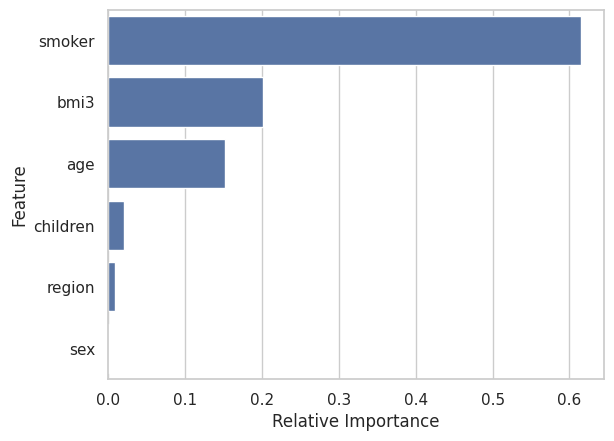

In [ ]:
rc = {
    'figure.figsize': (12*cm, 8*cm),
    'figure.dpi': 600,
}

with plt.rc_context(
    # rc=rc,
    rc=None,
    ):
    sns.barplot(x=forest_importances['importance'],
                y=forest_importances['feature'], color='C0')

    plt.xlabel('Relative Importance')
    plt.ylabel('Feature')

    plt.show()

In [ ]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
test_score = metrics.mean_squared_error(y_test, y_pred, squared=False)
test_score

5030.6471190985285

## Sample Predictions

In [13]:
X = (
    df.assign(bmi3=lambda df: pd.cut(df['bmi'], bins=bins, labels=labels))
    .drop(columns=['charges', 'bmi'])
)

y = pd.concat([df[['charges']],
               pd.DataFrame(reg.predict(X), columns=['charges_pred'])], axis=1)

X_test_ = X_test.reset_index(drop=True)
y_test_ = pd.concat([
        df.loc[X_test.index, 'charges'].reset_index(drop=True),
        (
            pd.DataFrame(reg.predict(X_test), columns=['charges_pred'])
            .rename({'charges_pred': 'charges_rf'}, axis=1)
        ),
        (
            pd.read_csv('glm_pred.csv')[['y_pred']]
            .rename({'y_pred': 'charges_glm'}, axis=1)
        )
    ], axis=1)

id_vars = ['age', 'sex', 'children', 'smoker', 'region', 'bmi3', 'charges']
value_vars = ['charges_rf', 'charges_glm']
df_plot = X_test_.join(y_test_).melt(id_vars=id_vars, value_vars=value_vars)

In [14]:
X_test_

,age,sex,children,smoker,region,bmi3
0,20,male,0,no,northeast,class III obese
1,28,male,3,no,southeast,class I obese
2,37,male,1,yes,southeast,class II obese
3,52,male,2,no,southwest,class II obese
4,59,female,0,no,southeast,class II obese
...,...,...,...,...,...,...
263,28,female,0,no,southwest,overweight
264,57,male,0,no,northeast,class III obese
265,60,male,0,yes,southeast,class III obese
266,63,male,0,no,northeast,class I obese


In [16]:
y_test_

,charges,charges_rf,charges_glm
0,1984.45,3001.921677,2975.401905
1,4449.46,5906.758040,6634.358194
2,39871.70,40356.412750,38602.717602
3,10325.21,14071.995784,12707.092581
4,12244.53,14103.962691,12947.173503
...,...,...,...
263,3161.45,4280.219719,3554.680385
264,20709.02,12413.446356,11172.604283
265,48673.56,46782.553819,60713.688698
266,13974.46,14058.372259,17207.915473


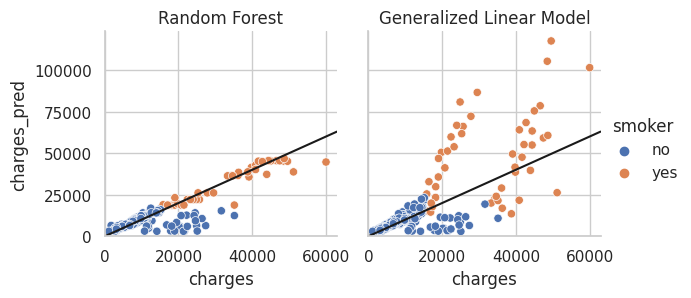

In [27]:
g = sns.relplot(x='charges', y='value', col='variable',
                # row='sex',
                hue='smoker',
                data=(
                    df_plot
                    # .query('1e4 < charges - value < 1e6')
                    ),
                height=8*cm)

g.set(xlim=(0,None), ylim=(0,None))
fig, axs = g.fig, g.axes

axs[0,0].set(title="Random Forest", ylabel="charges_pred")
axs[0,1].set(title="Generalized Linear Model")
for ax in axs.flatten():
    ax.axline((0,0), slope=1, color='k')

# fig.set(figsize=(1*cm,2*cm))

# DUMP

In [36]:
from io import StringIO

text = """19	male	0	no	southwest	overweight
19	female	0	no	southwest	overweight
24	male	0	no	southwest	overweight
29	male	0	no	southwest	overweight
49	male	0	no	southwest	overweight
69	male	0	no	southwest	overweight
29	male	0	yes	southwest	overweight
29	male	0	no	southwest	normal
29	male	0	no	southwest	class I obese
29	male	1	no	southwest	overweight
29	male	2	no	southwest	overweight
29	male	3	no	southwest	overweight"""


sample = pd.read_csv(StringIO(text), delimiter='\t', names=['age', 'sex', 'children', 'smoker', 'region', 'bmi3'])

reg.predict(sample)

array([ 2999.69708335,  3002.75143564,  3130.03150657,  4401.56132726,
       10703.81491613, 14088.71940936, 18767.38882416,  4407.67696297,
        4412.49044021,  5615.9753171 ,  5744.28159725,  5748.25159857])

In [40]:
for name,ser in sample.items():
    print(f"{name} = c{tuple(ser)},")

age = c(19, 19, 24, 29, 49, 69, 29, 29, 29, 29, 29, 29),
sex = c('male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male'),
children = c(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3),
smoker = c('no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no'),
region = c('southwest', 'southwest', 'southwest', 'southwest', 'southwest', 'southwest', 'southwest', 'southwest', 'southwest', 'southwest', 'southwest', 'southwest'),
bmi3 = c('overweight', 'overweight', 'overweight', 'overweight', 'overweight', 'overweight', 'overweight', 'normal', 'class I obese', 'overweight', 'overweight', 'overweight'),


In [ ]:
X_test_.join(y_test_).query('1e4 < charges - charges_rf < 1e6').sort_values(id_vars)

,age,sex,children,smoker,region,bmi3,charges,charges_rf,charges_glm
209,18,female,0,no,northeast,class I obese,21344.85,3004.764982,3442.545965
207,18,female,0,no,southeast,class II obese,14133.04,3007.261204,2988.452241
253,23,female,2,no,northeast,normal,22395.74,5950.965820,4375.671939
177,23,male,0,no,northwest,normal,21595.38,3074.584199,3230.622730
234,24,female,0,no,southeast,normal,25081.77,3132.256101,2915.546619
185,24,female,0,no,southwest,overweight,18955.22,3133.085859,3080.921902
182,24,male,0,yes,northeast,overweight,35147.53,18767.388824,21466.525952
24,25,female,0,no,northeast,class III obese,17878.90,3274.900376,3557.914210
152,28,female,2,no,southwest,overweight,20177.67,5686.969738,4779.585657
200,28,male,1,yes,southwest,class II obese,51194.56,38741.893991,26232.487852


In [ ]:
X_test_.groupby(['sex', 'children', 'smoker', 'region', 'bmi3']).count().query('age > 5')

,,,,,age
sex,children,smoker,region,bmi3,
female,0,no,southwest,overweight,7


In [ ]:
(
    X_test_.query('19 <= age <= 40 and bmi3 == "overweight" and sex == "male" and children == 0 and region == "southwest"')
    .join(y_test_)
    .sort_values('age')
)

,age,sex,children,smoker,region,bmi3,charges,charges_pred
27,19,male,0,no,southwest,overweight,1253.94,2999.697083
109,20,male,0,yes,southwest,overweight,16232.85,18767.388824
159,24,male,0,no,southwest,overweight,1977.82,3130.031507
145,37,male,0,no,southwest,overweight,20420.60,5923.514109


In [ ]:
idx_samples = [585,344,178,1119,719,770,803,169,401,985]
df = pd.read_excel('./Datasets/Medical Cost Personal.xlsx')

bins = [-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ['underweight', 'normal', 'overweight',
          'class I obese', 'class II obese', 'class III obese']

X_samples = (
    df.assign(bmi3=lambda df: pd.cut(df['bmi'], bins=bins, labels=labels))
    .drop(columns=['charges', 'bmi'])
    .loc[idx_samples,:]
)

X_samples

,age,sex,children,smoker,region,bmi3
585,46,female,1,no,southeast,overweight
344,20,female,5,no,southwest,class II obese
178,19,male,2,no,northwest,normal
1119,52,female,1,yes,northwest,normal
719,47,female,3,no,northwest,class I obese
770,49,female,4,no,southeast,class III obese
803,52,female,3,no,southwest,class III obese
169,25,male,0,no,northeast,overweight
401,38,male,1,no,southeast,overweight
985,21,female,1,yes,northeast,normal


In [ ]:
query = 'children == 2 & smoker == "no" & region == "northwest" & bmi3 == "normal"'
X.query(query).join(y)

,age,sex,children,smoker,region,bmi3,charges,charges_pred
178,19,male,2,no,northwest,normal,2803.70,7803.627719
197,21,male,2,no,northwest,normal,3077.10,6274.398293
333,28,female,2,no,northwest,normal,4719.74,6082.124766
352,29,female,2,no,northwest,normal,4906.41,6081.719185
377,33,male,2,no,northwest,normal,5257.51,6413.079107
442,37,male,2,no,northwest,normal,6198.75,6589.335169
482,37,female,2,no,northwest,normal,6686.43,6603.149076
483,39,male,2,no,northwest,normal,6710.19,7031.700199
497,38,female,2,no,northwest,normal,6933.24,6603.149076
656,46,female,2,no,northwest,normal,9193.84,9424.829527


In [ ]:
y_true = df.loc[idx_samples, 'charges']
y_pred = reg.predict(X_samples)

pd.concat([y_true, pd.Series(y_pred, index=X_samples.index, name='pred')],
          axis=1)

,charges,pred
585,8232.64,9470.435534
344,4830.63,5968.598055
178,2803.70,7803.627719
1119,23887.66,22065.233480
719,10115.01,10406.582500
770,10977.21,10702.610131
803,11411.69,13125.460524
169,2721.32,3274.900376
401,5484.47,6457.500587
985,15359.10,18713.864319
